In [1]:
import seaborn
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
interview = pd.read_csv('logatta.csv')
interview.head()

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False


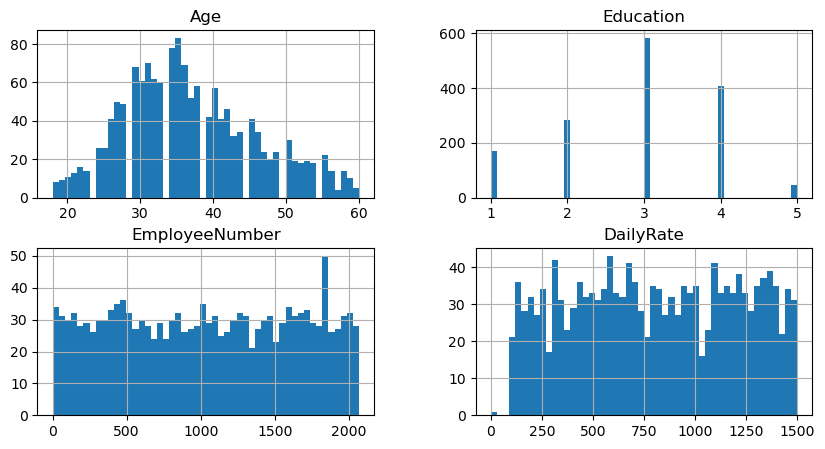

In [3]:
interview.hist(figsize=(10,5), bins=50)
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


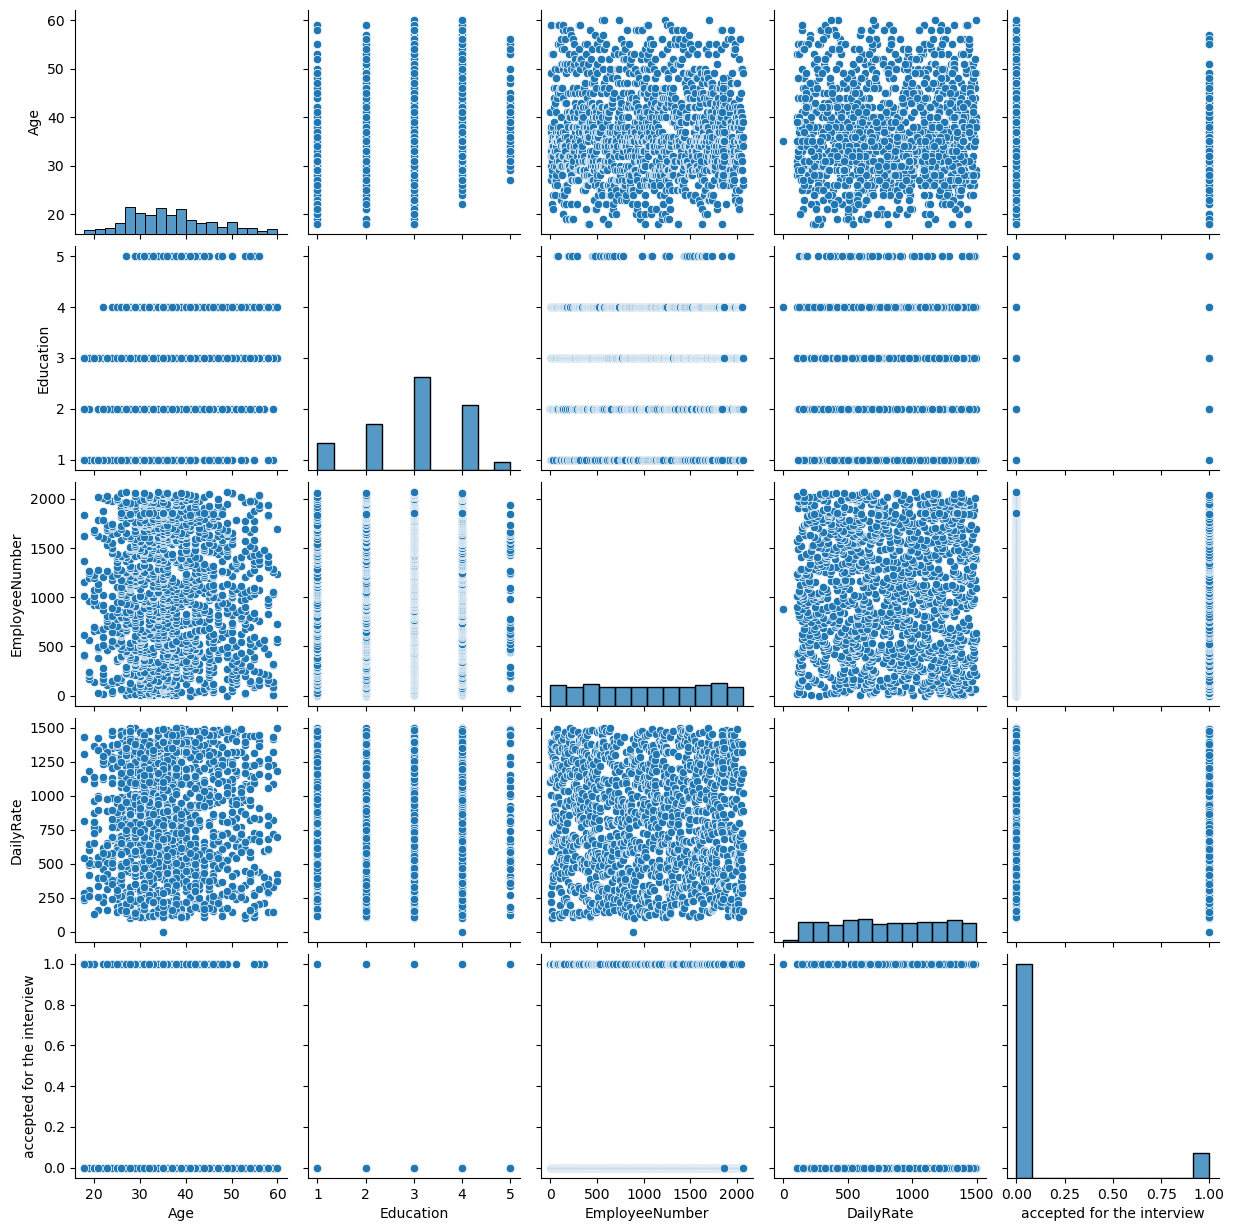

In [4]:
seaborn.pairplot(interview)

In [5]:
interview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1492 non-null   int64 
 1   BusinessTravel              1492 non-null   object
 2   Education                   1492 non-null   int64 
 3   MaritalStatus               1492 non-null   object
 4   OverTime                    1492 non-null   object
 5   EmployeeNumber              1492 non-null   int64 
 6   DailyRate                   1492 non-null   int64 
 7   Gender                      1492 non-null   object
 8   accepted for the interview  1492 non-null   bool  
dtypes: bool(1), int64(4), object(4)
memory usage: 94.8+ KB


In [6]:
for col in ["BusinessTravel","MaritalStatus", "Gender", "OverTime", "accepted for the interview"]:
    col_ord =OrdinalEncoder()
    interview[[col]]=col_ord.fit_transform(interview[[col]])

In [7]:
for col in ['Age', 'DailyRate', 'EmployeeNumber']:
    col_std = StandardScaler()
    interview[[col]] = col_std.fit_transform(interview[[col]])

In [8]:
interview

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,0.452168,2.0,2,2.0,1.0,-1.710930,0.735781,0.0,1.0
1,1.331314,1.0,1,1.0,0.0,-1.709278,-1.303018,1.0,0.0
2,0.012595,2.0,2,2.0,1.0,-1.705975,1.407124,1.0,0.0
3,-0.426978,1.0,4,1.0,1.0,-1.704323,1.454192,0.0,0.0
4,-1.086338,2.0,1,1.0,0.0,-1.701020,-0.530108,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1487,-0.207192,2.0,3,1.0,1.0,1.352668,-0.304675,1.0,0.0
1488,-0.207192,2.0,4,0.0,0.0,1.354320,0.738259,1.0,0.0
1489,-0.646765,2.0,3,2.0,1.0,1.355971,0.423644,1.0,0.0
1490,0.012595,2.0,4,2.0,0.0,1.357623,1.352624,0.0,0.0


<Axes: >

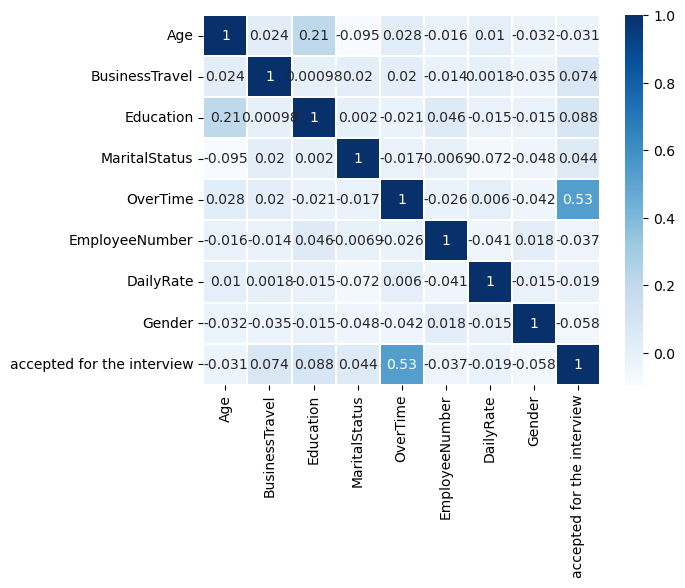

In [9]:
seaborn.heatmap(interview.corr(), annot=True,cmap="Blues", linewidths=.3)

In [10]:
corr_matrix = interview.corr(numeric_only=True)
corr_matrix['accepted for the interview'].sort_values(ascending=False)

accepted for the interview    1.000000
OverTime                      0.532409
Education                     0.088008
BusinessTravel                0.074106
MaritalStatus                 0.043778
DailyRate                    -0.019253
Age                          -0.031446
EmployeeNumber               -0.036753
Gender                       -0.057787
Name: accepted for the interview, dtype: float64

In [11]:
y = interview["accepted for the interview"].copy()
X = interview.drop('accepted for the interview', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
log_reg = LogisticRegression()
gaus_nb = GaussianNB()
k_nghb = KNeighborsClassifier()

In [13]:
scores = {};
predictions = {};
for model in [log_reg, gaus_nb, k_nghb]:
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions[model.__class__.__name__] = [y_pred]    
    scores[model.__class__.__name__] = [accuracy_score(y_test, y_pred)]

In [14]:
scores

{'LogisticRegression': [0.9130434782608695],
 'GaussianNB': [0.8695652173913043],
 'KNeighborsClassifier': [0.9498327759197325]}

In [15]:
predictions

{'LogisticRegression': [array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0